# Simulations

Now, do we have to create our own set of gates and operations? Well, it might be a good practice as the formalism can be easily reproduced by setting the basic needs:

* Basis $|0\rangle$ and $|1\rangle$ states.
* Tensor product operation
* A universal set of gates ($R_x(\theta), R_x(\theta), R_x(\theta), P(\phi)$ phase shift gate and $CNOT$ may suffice).

We can then create our own set of functions and objects to simulate those computations:

## From scratch {.unumbered}

We would easily create basic vector structures for our _quantum framework_. The minimum unit is the qubit and in order to frame the potential quantum states it may hold we would need to create the computational basis set $\{|0\rangle, |1\rangle \}$.

In [ ]:
import numpy as np
from qiskit.visualization import array_to_latex

zero = [[1], [0]]

array_to_latex(array=zero, prefix='|0\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

In [2]:
one = [[0], [1]]

array_to_latex(array=one, prefix='|1\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

Now lets try with some gates.

$$
X = \left[
\begin{array}{cc}
0 & 1 \\
1 & 0
\end{array}
\right] \quad 
H = \frac{1}{\sqrt{2}}\left[
\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}
\right]
$$

In [3]:
X = [[0,1],[1,0]]

array_to_latex(array=X, prefix='X = ', max_size=(10,10))

<IPython.core.display.Latex object>

In [4]:
hadamard = np.dot((1/(np.sqrt(2))), [[1, 1], [1, -1]])

array_to_latex(array=hadamard, prefix='H = ', max_size=(10,10))

<IPython.core.display.Latex object>

Well, it is already taking shape. We can test if the outcome matches our expectations.

In [5]:
superposition = np.dot(hadamard, zero)

array_to_latex(array=superposition, prefix='H|0\\rangle = |+\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

In [6]:
one = np.dot(X, zero)

array_to_latex(array=one, prefix='X|0\\rangle = |1\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

We can scale it to a couple of qubits to see what we get. Let's try to create on of the bell states we saw during class.

$$
|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad |\Phi^{-}\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)
$$
$$
|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad |\Psi^{-}\rangle = \frac{1}{\sqrt{2}}(|10\rangle - |10\rangle)
$$

We will need the CNOT gate for this.

In [7]:
CNOT = [[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]

array_to_latex(array=CNOT, prefix='CNOT = ', max_size=(10,10))

<IPython.core.display.Latex object>

With this we will create a two qubit system, apply the Hadamard gate to the first one and the CNOT gate with the conrol over the first qubit as well.

In [8]:
# Initial state
init_state = np.kron(zero, zero)

# (I tensor Hadamard)
HI = np.kron(hadamard, np.eye(2))

With that we can perform the full operation

$$
CNOT (I\otimes H)|00\rangle = |\Phi^{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle
$$

In [9]:
psi_1 = np.dot(HI, init_state)
psi = np.dot(CNOT, psi_1)

array_to_latex(array=psi, prefix='|\\psi\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

There you go. This is our entangled 2-qubit state. Building the whole formalism from scratch might be tedious, but it helps us understand every detail of it.

Of course, in order to continue forward, we will take advantage of the collective effort and use some existing tools to ease our way into quantum computing.

## QuTip

Of course, we are not the first ones with this need, so there do exist some quite useful libraries in this domain. [QuTiP](https://qutip.org/) might be one of the most used ones (at least for us, Python enthusiasts).

In [10]:
import scipy
import numpy as np
from qutip import Qobj, mesolve
from qutip import basis, tensor
from qutip.qip.operations import cnot

# Basis states
zero = basis(2,0)
one = basis(2,1)

# |10>
one_zero = tensor(one, zero)

# CNOT
hamiltonian = cnot().full()

# e^itH
u_generator = Qobj(1j * scipy.linalg.logm(hamiltonian), dims=[[2] * 2] * 2)

# Time range 0.0 -> 1.0
times = np.arange(0, 1.1, 0.1)

# \psi = H\psi_0
evolution = mesolve(u_generator, one_zero, times)

In [11]:
evolution.states[0]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [12]:
evolution.states[1]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.        +0.j        ]
 [0.        +0.j        ]
 [0.97552824+0.15450855j]
 [0.02447175-0.15450855j]]

In [13]:
evolution.states[-1]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 [1.07316279e-06+9.88099195e-07j]
 [1.00000000e+00-9.88099195e-07j]]

Let's go by steps.

In [14]:
from qutip import basis, tensor

one = basis(2,1)
zero = basis(2,0)

one_zero = tensor(one, zero) # |10>
one_zero

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [15]:
from qutip.qip.operations import cnot

cnot_matrix = cnot().full()
cnot_matrix

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In fact, it allows us to do more than just the simple operations we envisioned. For example, we could generate the whole evolution over a period of time of the $U$ unitary generated for our Hamiltonian.

In [18]:
from qutip import identity
from qutip.qip.operations import hadamard_transform

# hamiltonian
hamiltonian =  cnot() * tensor(hadamard_transform(1), identity(2))
hamiltonian

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]]

In [19]:
import numpy as np
import scipy
from qutip import Qobj, mesolve

# Initial state
init_state = tensor(zero, zero) # |00>

# e^itH
u_generator = Qobj(1j * scipy.linalg.logm(hamiltonian.full()), dims=[[2] * 2] * 2)

# Time range
times = np.arange(0, 1.1, 0.1)
evolution = mesolve(u_generator, init_state, times)

In [20]:
evolution.states[0]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [21]:
evolution.states[1]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.99487486+0.02262725j]
 [-0.00204247+0.02262725j]
 [-0.03057749-0.05462701j]
 [ 0.04788161-0.05462701j]]

In [22]:
evolution.states[-1]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 7.07106734e-01-2.77290944e-08j]
 [-2.74299662e-08-2.77290944e-08j]
 [ 6.61796939e-08+6.69439559e-08j]
 [ 7.07106828e-01+6.69439558e-08j]]

In [23]:
psi = np.round(evolution.states[-1].full(), decimals = 5)

array_to_latex(array=psi, prefix='|\\psi\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

Looks like $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ but due to numerical imprecisions we wil get this type of ugly structures in between. We will need to familiarize with those artifacts as _noise_ when using hardware will produce similar numerical artifacts.

Well, having a theoretical framework may be a good option for simulating and doing some local experimentation but that will reach soon limitations when trying to scale it up. Our classical device won't be able to perform the whole system calculations and we might need to switch to actual quantum computers doing those. Therefore, we need to find a way to o so.

This is why some manufacturers have invested time and effort on creating open-source frameworks to be adopted by the community (and position themselves). Companies such as [IBM](https://qiskit.org/) or [AWS](https://github.com/aws/amazon-braket-sdk-python) have leveraged their own version that also allows for these programs to be sent to an end device that will perform the set of operations.

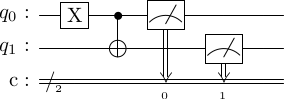

In [26]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

qc.draw('latex')

## Qiskit

Qiskit is IBM's quantum computing toolkit the enables interaction with their devices. Let's first start replicating the theoretical basis and then move forward up to device simulation.

Opflow is the framework section dedicated to provide the pieces to perform previous computations.

In [27]:
from qiskit.quantum_info import Statevector

Zero = Statevector.from_label('0')
One = Statevector.from_label('1')

In [28]:
probs = Zero.probabilities()
print('Probability of measuring 0: {}'.format(probs[0]))

Probability of measuring 0: 1.0


In [29]:
print('Probability of measuring 1: {}'.format(probs[1]))

Probability of measuring 1: 0.0


In [30]:
Plus = Statevector.from_label('+')

print(Plus)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [31]:
Plus.probabilities()

array([0.5, 0.5])

Qiskit tends to understand everything in terms of circuits. But in essence we can request the actual operation being performed there and check that the Hadamard action over a $|0\rangle$ state (the initial state) provides the $|+\rangle$ state as expected.

In [32]:
array_to_latex(array=Plus.data, prefix='|+\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

What would be the outcome of it?

In [33]:
probs = Plus.probabilities()
print('Probability of measuring 0: {}'.format(probs[0]))

Probability of measuring 0: 0.4999999999999999


This is the expected outcome for the $\langle 0 | \psi \rangle$ operation. But we can mimic it as well.

In [34]:
abs(np.dot(Zero.data, Plus.data.T)**2)

0.4999999999999999

Similarly gate operations can be used.

In [35]:
from qiskit.quantum_info import Pauli

X = Pauli('X')

And what is the amplitude of $|1\rangle$ after the $X|0\rangle$ operation?

In [36]:
Zero.evolve(X) == One

True

Qiskit orders bits in a specific manner so some gates may look different but is just a matter of ordering when applying the operations.

In [38]:
from qiskit.circuit.library import UnitaryGate

matrix = [[1., 0., 0., 0.],
          [0., 0., 0., 1.],
          [0., 0., 1., 0.],
          [0., 1., 0., 0.]]
CNOT = UnitaryGate(matrix)

Let play around with the Bell state we produced before

$$
CNOT (I\otimes H)|00\rangle = |\Phi^{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle
$$

In [39]:
print(Zero ^ Zero)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [40]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)

qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [41]:
from qiskit.quantum_info import Operator

print(Operator(qc).data)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]


In [42]:
(Zero ^ Zero).evolve(qc).data

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

In [43]:
bell_state = (Zero ^ Zero).evolve(qc).evolve(CNOT)
bell_state.data

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [44]:
array_to_latex(array=bell_state.data, prefix='|\\psi\\rangle = ', max_size=(10,10))

<IPython.core.display.Latex object>

Of course the gate-based nature of IBM devices makes it more natural to directly code our approach as a gate based circuit.

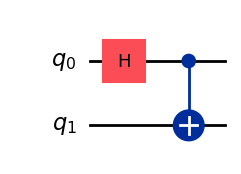

In [45]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.draw('mpl')

Most likelly moving forward, this pictorical approach will ease the abstraction but is good to know that, the formalism is still there.

In [46]:
print('Math:', (Zero ^ Zero).evolve(qc).probabilities())

Math: [0.5 0.  0.  0.5]


Of course qiskit offers some other nice ways to simulate and visualize the results.

In [49]:
from qiskit.quantum_info import Statevector

psi  = Statevector.from_instruction(qc)

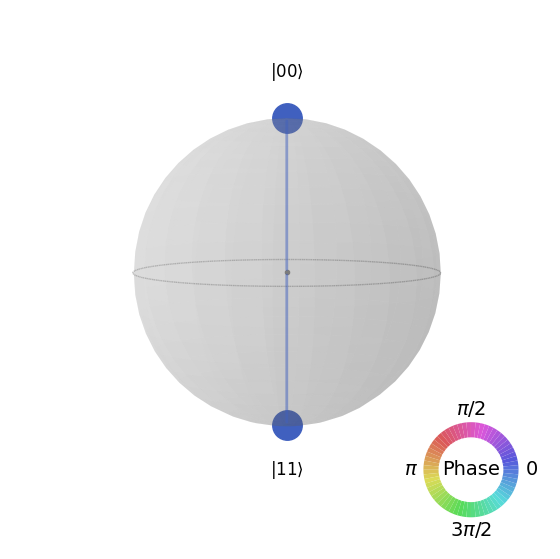

In [50]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(psi)

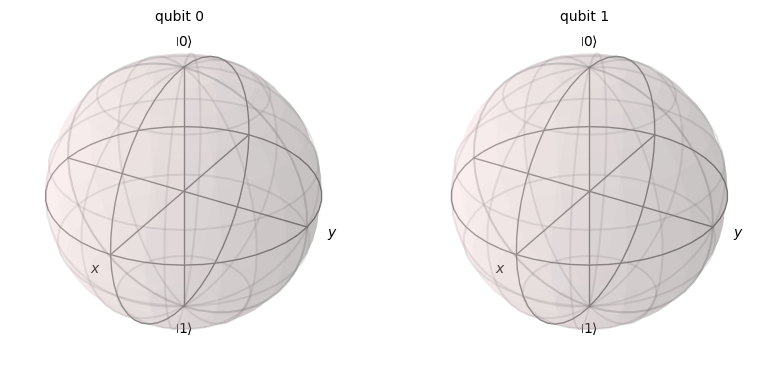

In [51]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(psi)

In order to simulate the actual action of the circuit we will need to add some classical registers and measurement operations.

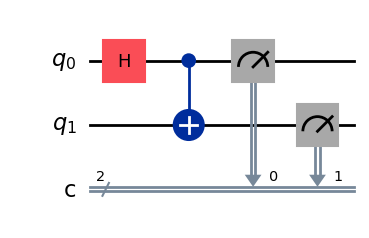

In [52]:
circuit = QuantumCircuit(2, 2)

circuit = circuit.compose(qc)

circuit.measure([0,1],[0,1])

circuit.draw('mpl')

In [53]:
from qiskit_aer import AerSimulator

# execute the quantum circuit
simulator = AerSimulator()

result = simulator.run(circuit, shots=1000).result()
counts  = result.get_counts(circuit)
print(counts)

{'00': 484, '11': 516}


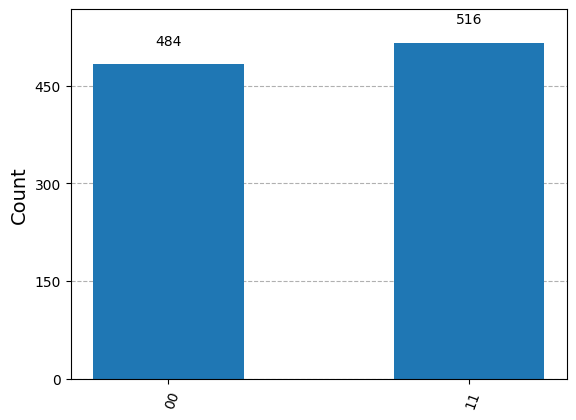

In [54]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

## Exercise

Could we create a state that superposes all potential basis states for a 2-qubit configuration? 

$$
|00\rangle + |01\rangle + |10\rangle + |11\rangle
$$

In [55]:
qc = QuantumCircuit(2)

# HERE GOES YOUR CIRCUIT

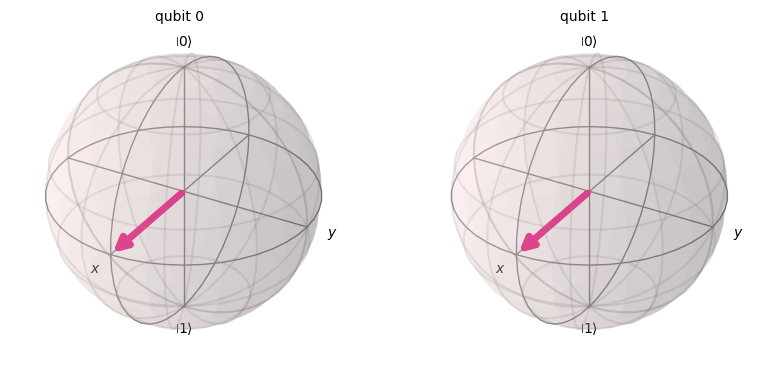

In [ ]:
psi  = Statevector.from_instruction(qc)

plot_bloch_multivector(psi)

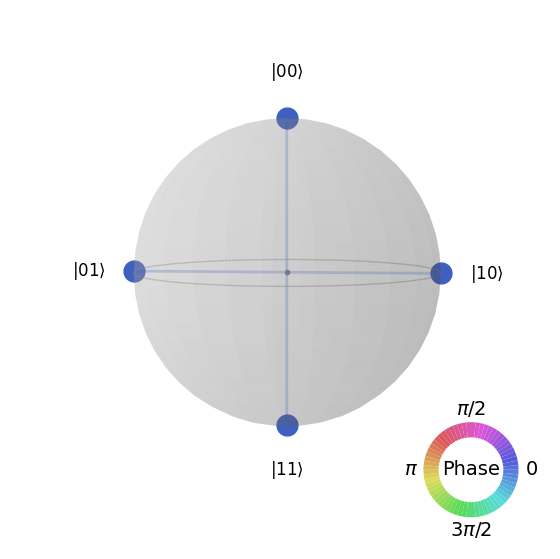

In [53]:
plot_state_qsphere(psi)

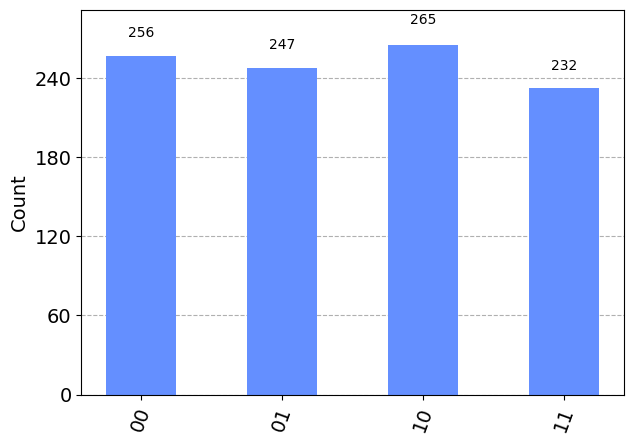

In [ ]:
circuit = QuantumCircuit(2, 2)
circuit = circuit.compose(qc)
circuit.measure([0,1],[0,1])

# execute the quantum circuit
simulator = AerSimulator()

result = simulator.run(circuit, shots=1000).result()
counts  = result.get_counts(circuit)

plot_histogram(counts)